
 # Supervised Machine Learning

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the data
data_link = "http://bit.ly/w-data"
data=pd.read_csv(data_link)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# checking for null value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Exploratory  Data  Analysis

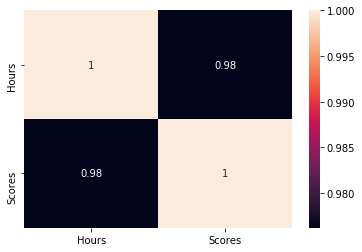

In [7]:
# checking correlation b/w hours and scores
sns.heatmap(data.corr(),annot=True)

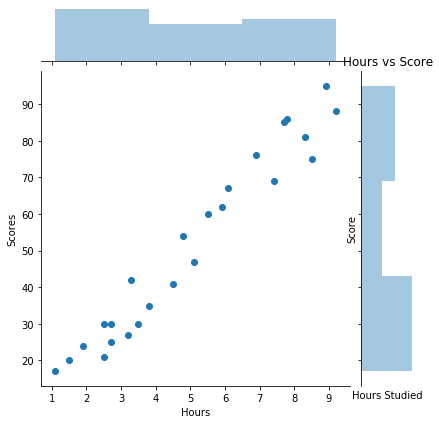

In [8]:
#data visualization
sns.jointplot(x='Hours',y='Scores',data=data)
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score') 
plt.show()

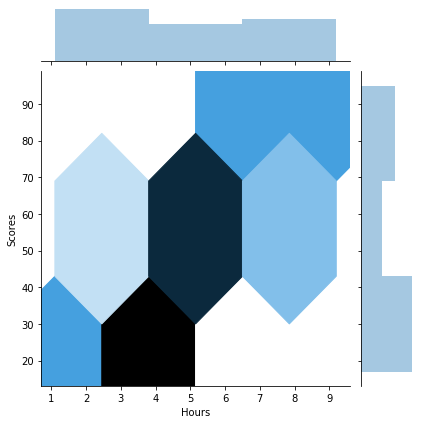

In [9]:
sns.jointplot(x='Hours',y='Scores',data=data,kind='hex')


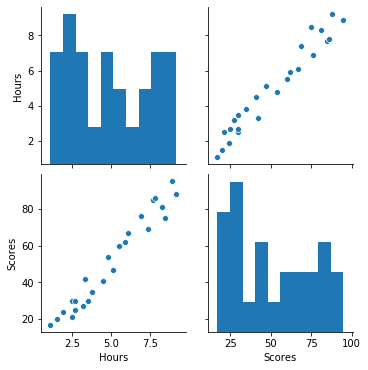

In [10]:
sns.pairplot(data)

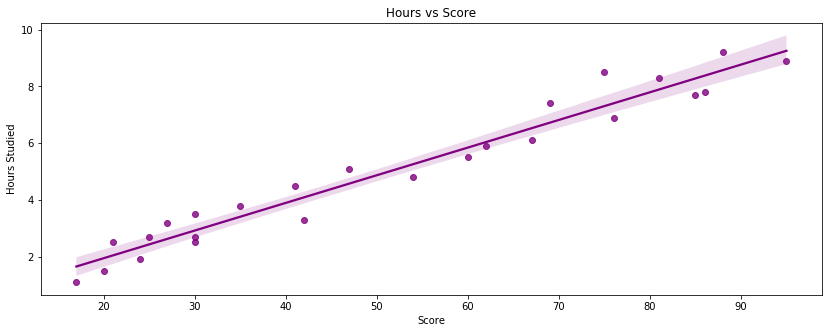

In [11]:
plt.figure(figsize=(14,5))
sns.regplot(data['Scores'],data['Hours'],color='purple')
plt.title('Hours vs Score')  
plt.ylabel('Hours Studied')  
plt.xlabel('Score') 
plt.show()


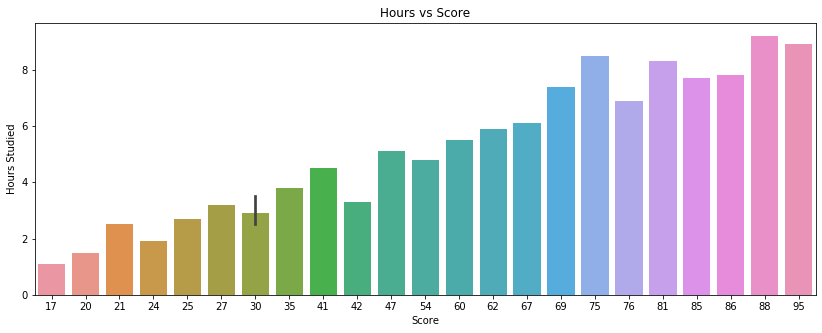

In [12]:
plt.figure(figsize=(14,5))
sns.barplot(data['Scores'],data['Hours'])
plt.title('Hours vs Score')  
plt.ylabel('Hours Studied')  
plt.xlabel('Score') 
plt.show()


In [13]:
#checking the length of data
len(data)

25

### setting up X and y to pass in train_test_split

In [14]:
X=data.iloc[:,:-1].values

In [15]:
y=data.iloc[:,-1].values

In [16]:
# checking dimensions of X and Y
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.22, random_state=96) 

## Training the Model

Now its time to train our model on our training data!


In [18]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [19]:
print(lm.coef_)

[9.84114762]


In [20]:
print(lm.intercept_)

1.9830910563749953


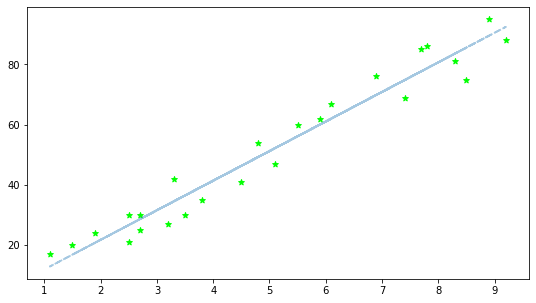

In [21]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting our test data
plt.figure(figsize=(9,5))
plt.scatter(X, y,marker='*',color='lime')
plt.plot(X, line,lw=1.8,ls='--',alpha=0.4);
plt.show()

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [22]:
predict=lm.predict(X_test)

In [23]:
predict

array([56.10940296, 83.66461629, 26.5859601 , 26.5859601 , 20.68127153,
       60.045862  ])

## Evaluating the Model

In [24]:
# predicctns vs real value
pd.DataFrame(data=[y_test,predict],index=['y_test','predicted value']).transpose()

,y_test,predicted value
0,60.0,56.109403
1,81.0,83.664616
2,21.0,26.585960
3,30.0,26.585960
4,24.0,20.681272
5,62.0,60.045862


**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [25]:
from sklearn import metrics

In [26]:
metrics.v_measure_score(y_test,predict)

0.93108094372919

In [27]:
metrics.explained_variance_score(y_test,predict)

0.9747453611160837

In [28]:
print('MAE:' ,metrics.mean_absolute_error(y_test,predict))
print('MSE:',metrics.mean_squared_error(y_test,predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predict)))

MAE: 3.471346632602503
MSE: 13.321359659454636
RMSE: 3.649843785623521


# Accuracy

In [29]:
Accu=lm.score(X_test,y_test)*100
print('Accuracy is {} '.format(Accu))

Accuracy is 97.37193693697739 


# Predicting a new data

by entering the no of hours we can now get our percentage score


In [30]:
hours=float(input('enter the no ofstudy hours:-  '))
predicted=lm.predict([[hours]])
print('If a student studies for = {}'.format(hours),'hours then his/her predicted score can be = {}%'.format(predicted))

enter the no ofstudy hours:-  9.25
If a student studies for = 9.25 hours then his/her predicted score can be = [93.01370653]%


In [31]:
# You can also test with your own data
hours = [[7.95]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[7.95]]
Predicted Score = 80.22021462207465


# What will be predicted score if a student study for 9.25 hrs in a day?

In [32]:
hours = [[9.25]]
new_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.01370652589975


# So our Linear Regression Model works successfully with Accuracy of model is **97.37** , Mean absolute Error of 3.47 and Root Mean Squared error of 3.64